# Using Different Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Loading of data

In [2]:
HeartDisease = pd.read_csv('./Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County (2).csv')

In [3]:
HeartDisease

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59071,2014,TX,Lubbock County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Male,Race/Ethnicity,Asian and Pacific Islander,T2,48303,"(33.613697, -101.820878)"
59072,2014,TX,Mitchell County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Male,Race/Ethnicity,Black,T2,48335,"(32.306972, -100.919542)"
59073,2014,IA,Winnebago County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,19189,"(43.375754, -93.73907)"
59074,2014,WV,Lewis County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,54041,"(38.995666, -80.505332)"


# Performing Exploratory Data Analysis

In [4]:
HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59076 entries, 0 to 59075
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        59076 non-null  int64  
 1   LocationAbbr                59076 non-null  object 
 2   LocationDesc                59076 non-null  object 
 3   GeographicLevel             59076 non-null  object 
 4   DataSource                  59076 non-null  object 
 5   Class                       59076 non-null  object 
 6   Topic                       59076 non-null  object 
 7   Data_Value                  32149 non-null  float64
 8   Data_Value_Unit             59076 non-null  object 
 9   Data_Value_Type             59076 non-null  object 
 10  Data_Value_Footnote_Symbol  26927 non-null  object 
 11  Data_Value_Footnote         26927 non-null  object 
 12  StratificationCategory1     59076 non-null  object 
 13  Stratification1             590

# Data cleaning process

### Checking for null values

In [5]:
HeartDisease.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    26927
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    32149
Data_Value_Footnote           32149
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Location 1                       18
dtype: int64

### Removal of Null values

In [6]:
HeartDisease = HeartDisease.dropna(axis=1)

In [7]:
HeartDisease

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value_Unit,Data_Value_Type,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2013
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2016
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2020
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2050
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T2,2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59071,2014,TX,Lubbock County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Male,Race/Ethnicity,Asian and Pacific Islander,T2,48303
59072,2014,TX,Mitchell County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Male,Race/Ethnicity,Black,T2,48335
59073,2014,IA,Winnebago County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,19189
59074,2014,WV,Lewis County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,54041


In [8]:
HeartDisease.duplicated().sum()

0

In [9]:
HeartDisease.dtypes

Year                        int64
LocationAbbr               object
LocationDesc               object
GeographicLevel            object
DataSource                 object
Class                      object
Topic                      object
Data_Value_Unit            object
Data_Value_Type            object
StratificationCategory1    object
Stratification1            object
StratificationCategory2    object
Stratification2            object
TopicID                    object
LocationID                  int64
dtype: object

# Analysis and Visualisation

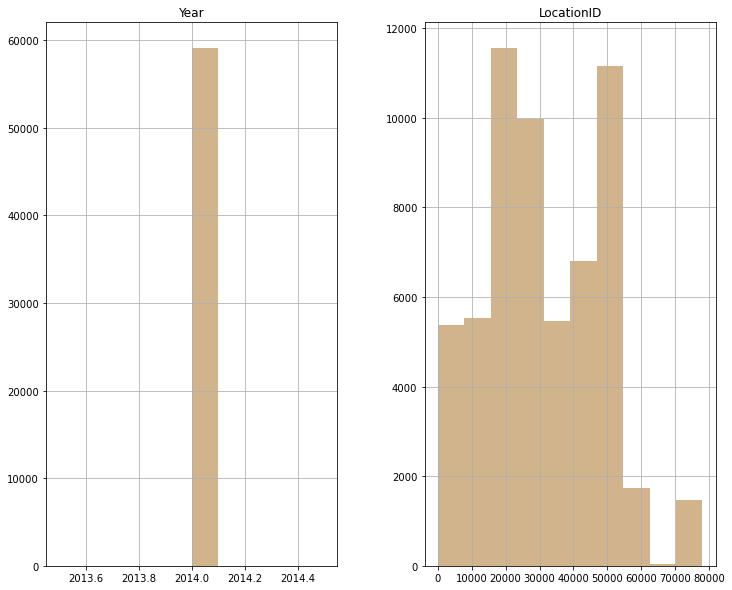

In [10]:
HeartDisease.hist(figsize=(12,10),color='tan')
plt.show()

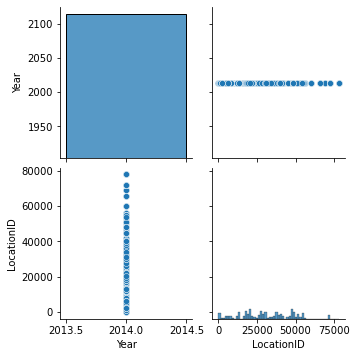

In [11]:
sns.pairplot(HeartDisease)

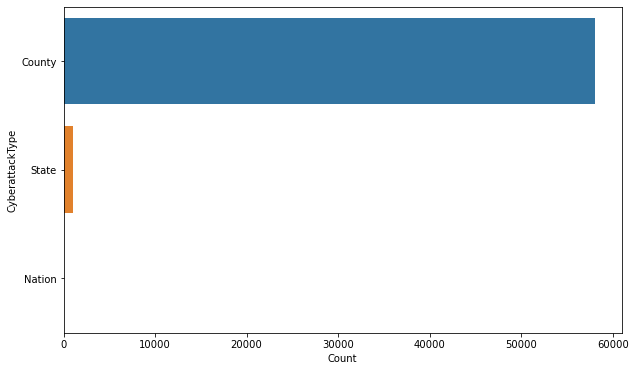

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='GeographicLevel', data=HeartDisease)
plt.xlabel('Count')
plt.ylabel('CyberattackType')
plt.show()

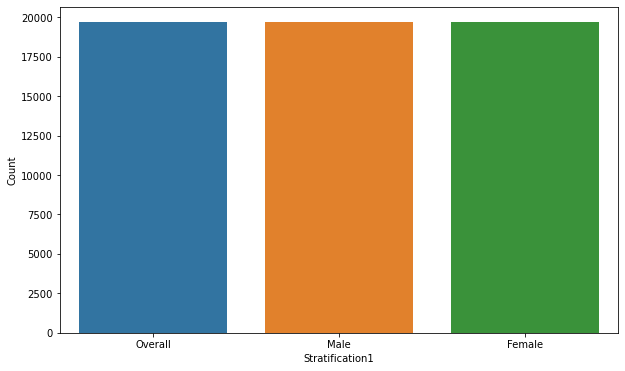

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stratification1', data=HeartDisease)
plt.ylabel('Count')
plt.xlabel('Stratification1')
plt.show()

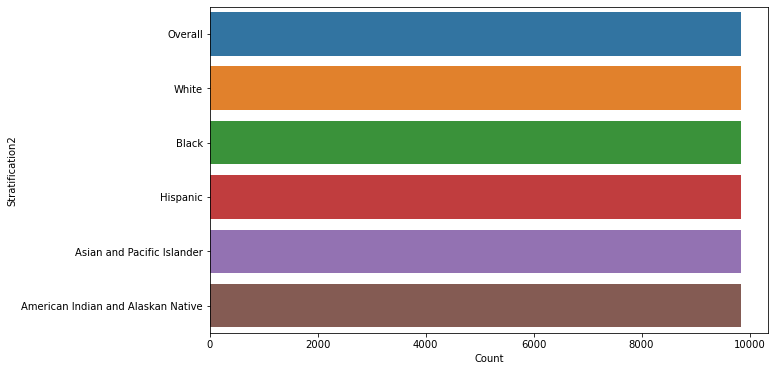

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Stratification2', data=HeartDisease)
plt.xlabel('Count')
plt.ylabel('Stratification2')
plt.show()

# Performing Correlation analysis

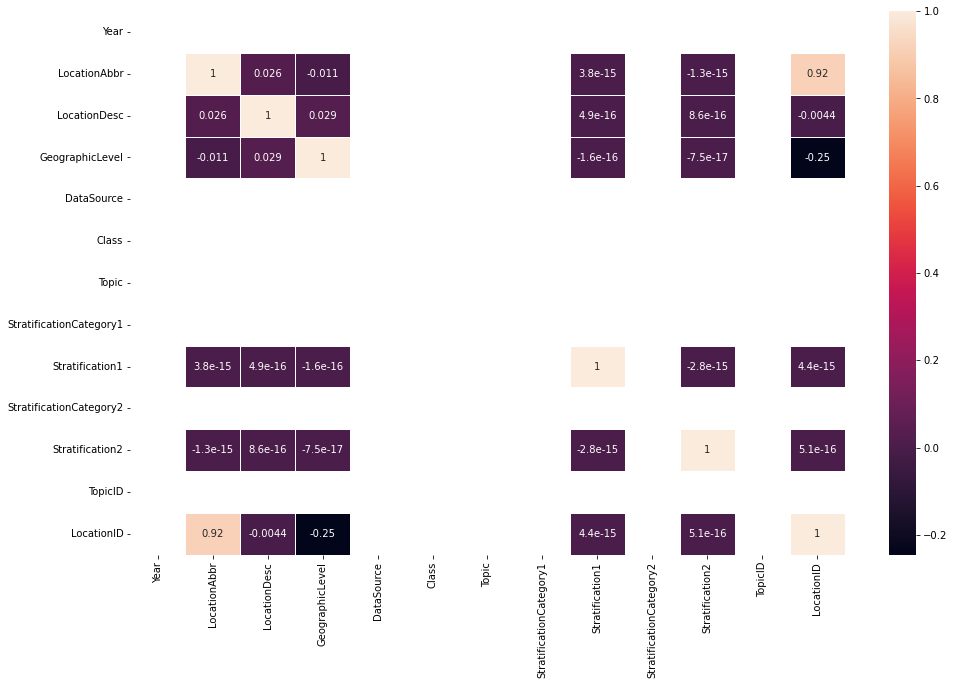

In [23]:
cor = HeartDisease.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor, annot= True, linewidths= 0.5)
plt.show()

In [26]:
HeartDisease[['LocationAbbr', 'GeographicLevel', 'DataSource', 'Class', 'Topic', 'StratificationCategory1', 'Stratification1', 'Stratification2', 'TopicID']] = HeartDisease[['LocationAbbr', 'GeographicLevel', 'DataSource', 'Class', 'Topic', 'StratificationCategory1', 'Stratification1', 'Stratification2', 'TopicID']].apply(lambda col:pd.Categorical(col).codes)

# Initialising Machine Learning process

In [27]:
X = HeartDisease.drop(['Data_Value_Unit', 'Data_Value_Type', 'Class'], axis=1)
y = HeartDisease['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
HeartDisease.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value_Unit', 'Data_Value_Type',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'TopicID', 'LocationID'],
      dtype='object')

In [24]:
HeartDisease.dtypes

Year                        int64
LocationAbbr                 int8
LocationDesc                int16
GeographicLevel              int8
DataSource                   int8
Class                        int8
Topic                        int8
Data_Value_Unit            object
Data_Value_Type            object
StratificationCategory1      int8
Stratification1              int8
StratificationCategory2      int8
Stratification2              int8
TopicID                      int8
LocationID                  int64
dtype: object

# Implementing Decision Tree Classifier

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

Decision Tree Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17723

    accuracy                           1.00     17723
   macro avg       1.00      1.00      1.00     17723
weighted avg       1.00      1.00      1.00     17723



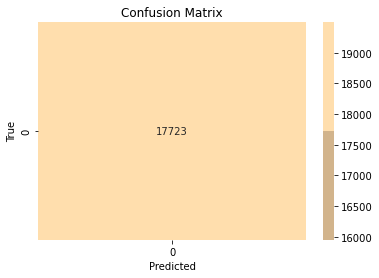

In [30]:
cm = confusion_matrix(y_test, dt_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap=['tan','navajowhite'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

# Implementing Gaussian NB

In [33]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [34]:
nb_predictions = nb_model.predict(X_test)
print("Gaussian NB Classifier Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

Gaussian NB Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17723

    accuracy                           1.00     17723
   macro avg       1.00      1.00      1.00     17723
weighted avg       1.00      1.00      1.00     17723



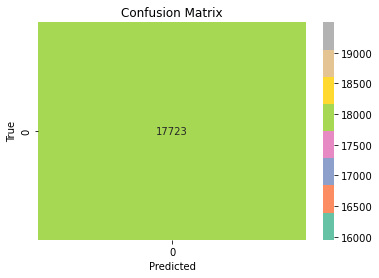

In [35]:
cm1 = confusion_matrix(y_test, nb_predictions)

sns.heatmap(cm1, annot=True, fmt='d', cmap= 'Set2')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()